# Β' Μέρος Εργασίας

### **Improting Libraries**
##### Πριν ξεκινήσουμε την ανάλυση του δικτύου πρέπει πρώτα να εισάγουμε τις απαραίτητες βιβλιοθήκες

In [16]:
import networkx as nx
from networkx.algorithms import community
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time

### **Εισαγωγή του dataset και αποτύπωση**
##### Εισάγουμε το dataset και ύστερα αποτυπώνουμε τους κόμβους και τις ακμές

Number of edges 139
Number of nodes 123


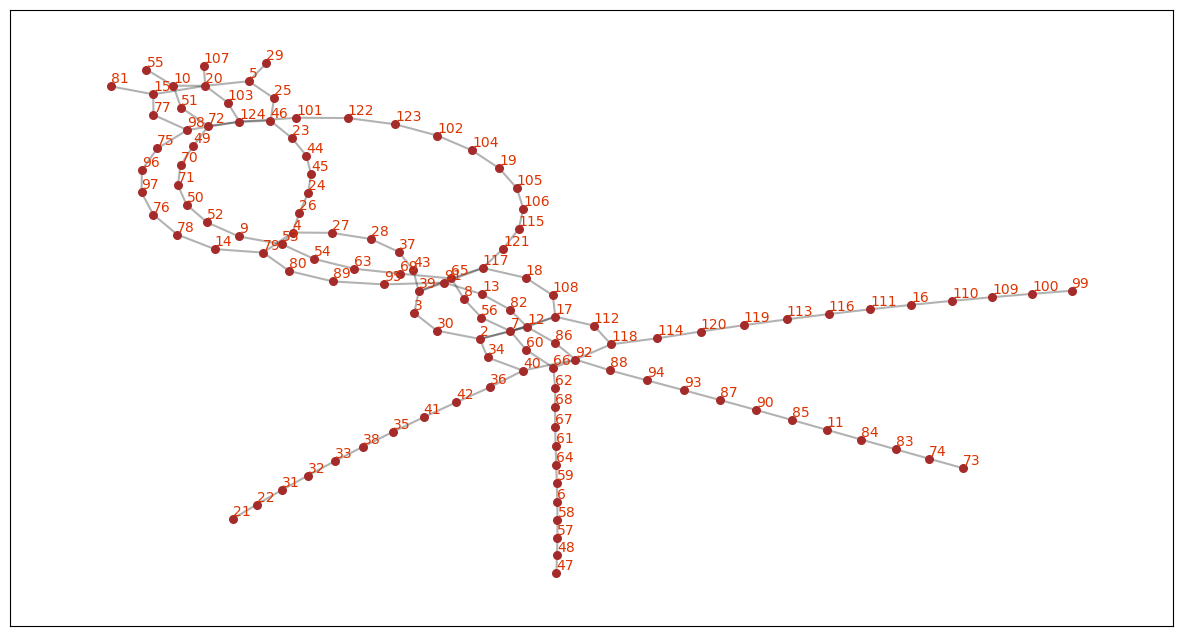

In [17]:
#Ανοίγουμε το αρχείο και διαβάζουμε τον γράφο με τη χρηση της βιβλιοθήκης networkx
fh = open("data/ENZYMES_g295.edges", "rb")
graph = nx.read_edgelist(fh)
fh.close()

#Τυπώνουμε τον αριθμό των ακμών και τον αριθμό κόμβων
print("Number of edges" ,(graph.number_of_edges()))
print("Number of nodes" ,(graph.number_of_nodes()))

#παράμετροι για την εμφάνηση των κόμβων
node_options = {"node_color": "brown", "node_size": 30}

#παράμετροι για την εμφάνηση των ακμών
edge_options = {"width": 1.50 , "alpha": .30, "edge_color": "black"}

#παράμετροι για την εμφάνηση των αριθμών
node_label_options = {"font_size": 10, "font_color": "#dd3300", "verticalalignment": "bottom", "horizontalalignment": "left"}

#Τυπώνουμε το γράφημα χρησιμοποιώντας τις κατάλληλες παραμέτρους ώστε να είναι πιο ευανάγνωστο
plt.figure(figsize=(15,8))
pos = nx.kamada_kawai_layout(graph)
nx.draw_networkx_nodes(graph, pos, **node_options)
nx.draw_networkx_edges(graph, pos, **edge_options)
nx.draw_networkx_labels(graph, pos, **node_label_options)
plt.show()

# **Εξαγωγή πληροφοριών από το dataset**
##### Αρχικα το πρώτο διάγραμμα απεικονίζει το βαθμό κάθε κόμβου (Node Degree). Στον άξονα χ έχουμε το αριθμό ακμών του κάθε κόμβου και στο ψ τον αριθμό κόμβων.

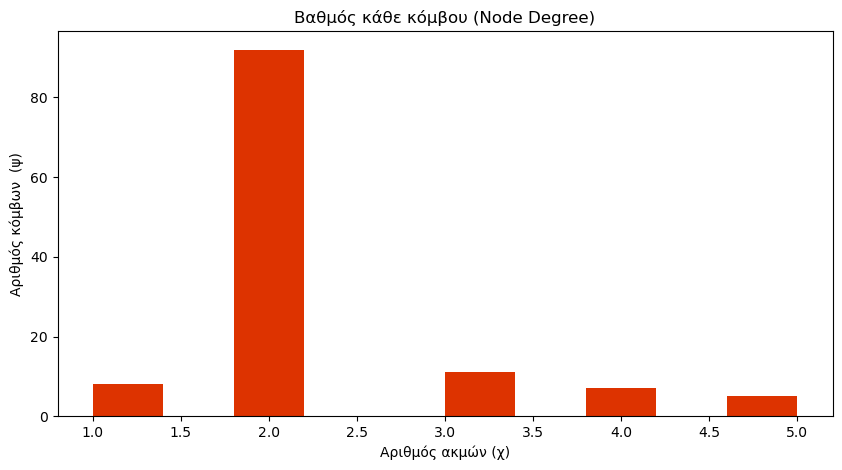

In [18]:
plt.figure(figsize=(10,5))
plt.title('Βαθμός κάθε κόμβου (Node Degree)')
plt.xlabel('Αριθμός ακμών (χ)')
plt.ylabel('Αριθμός κόμβων  (ψ)')

#Η συνάρτηση nx.degree(graph) υπολογίζει τον βαθμό του κάθε κόμβου
plt.hist([v for k,v in nx.degree(graph)], color="#dd3300", bins=10)
plt.show()

- Μέσο μήκος μονοπατιού (Average Shortest Path)

In [19]:
print('Μέσο μήκος μονοπατιού:',nx.average_shortest_path_length(graph))

Μέσο μήκος μονοπατιού: 12.206317473010795


### Clustering Coefficient

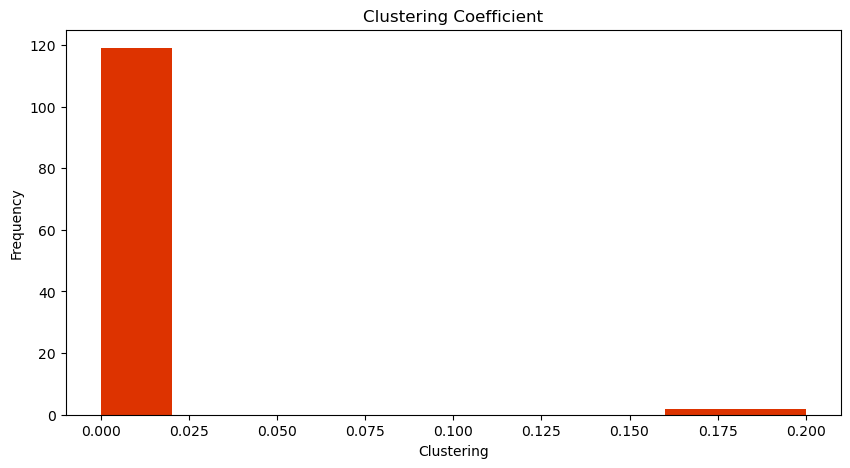

In [20]:
plt.figure(figsize=(10,5))
plt.title('Clustering Coefficient')
plt.xlabel('Clustering')
plt.ylabel('Frequency')

#Η συνάρτηση nx.clustering(graph) υπολογίζει το Clustering Coefficient
plt.hist(nx.clustering(graph).values(),color="#dd3300", bins=10)
plt.show()

### Κεντρικότητα

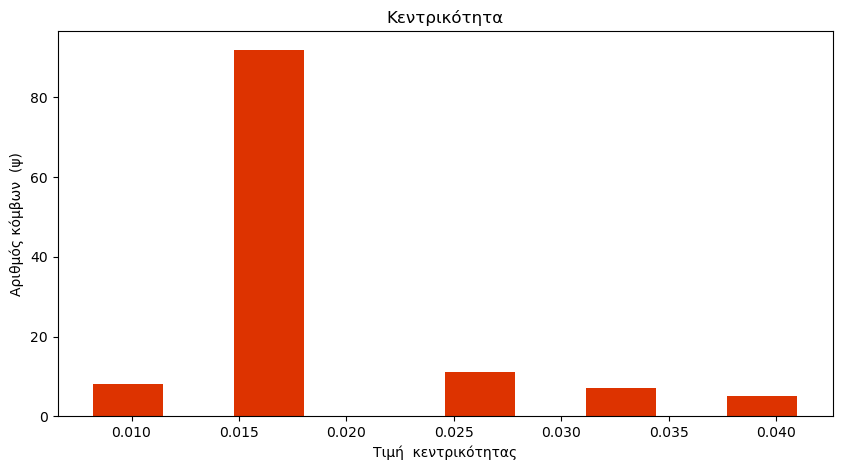

In [21]:
plt.figure(figsize=(10,5))
plt.title('Κεντρικότητα')
plt.xlabel('Τιμή  κεντρικότητας')
plt.ylabel('Αριθμός κόμβων  (ψ)')

#Η συνάρτηση nx.centrality.degree_centrality(graph) υπολογίζει την κεντρικότητα
plt.hist(nx.centrality.degree_centrality(graph).values(), color="#dd3300", bins=10)
plt.show()

### Κεντρικότητα εγγύτητας (Closeness centrality)

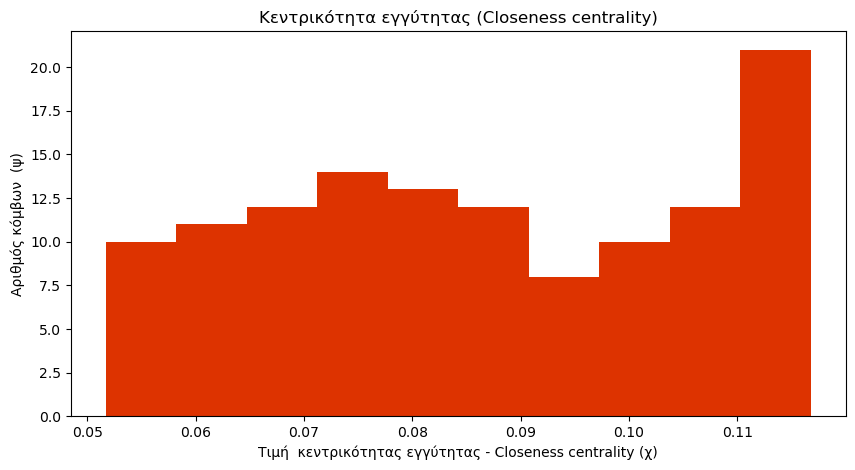

In [22]:
plt.figure(figsize=(10,5))
plt.title('Κεντρικότητα εγγύτητας (Closeness centrality)')
plt.xlabel('Τιμή  κεντρικότητας εγγύτητας - Closeness centrality (χ)')
plt.ylabel('Αριθμός κόμβων  (ψ)')

#Η συνάρτηση nx.centrality.closeness_centrality(graph) υπολογίζει την κεντρικότητα εγγύτητας
plt.hist(nx.centrality.closeness_centrality(graph).values(), color="#dd3300", bins=10)
plt.show()

### Ενδιαμεσική κεντρικότητα (Betweenness centrality)

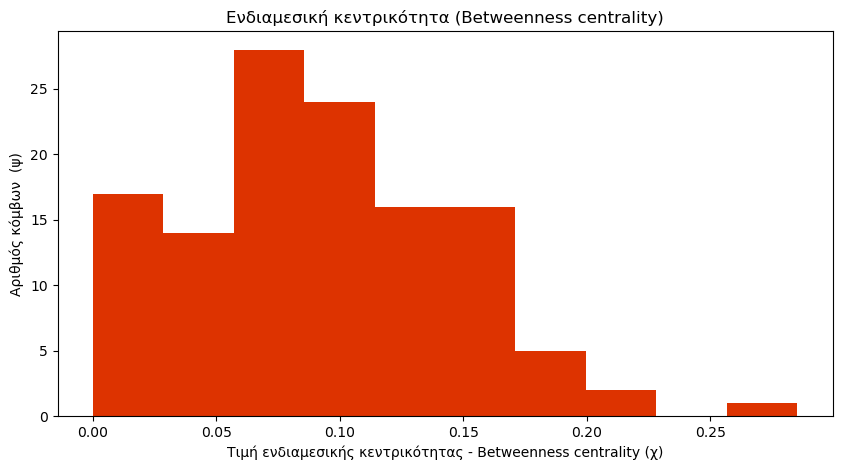

In [23]:
plt.figure(figsize=(10,5))
plt.title('Ενδιαμεσική κεντρικότητα (Betweenness centrality)')
plt.xlabel('Τιμή ενδιαμεσικής κεντρικότητας - Betweenness centrality (χ)')
plt.ylabel('Αριθμός κόμβων  (ψ)')

#Η συνάρτηση nx.centrality.betweenness_centrality(graph) υπολογίζει την ενδιαμεσική κεντρικότητα
plt.hist(nx.centrality.betweenness_centrality(graph).values(), color="#dd3300", bins=10)
plt.show()

### Κεντρικότητα ιδιοδιανυσμάτων (eigenvector centrality).

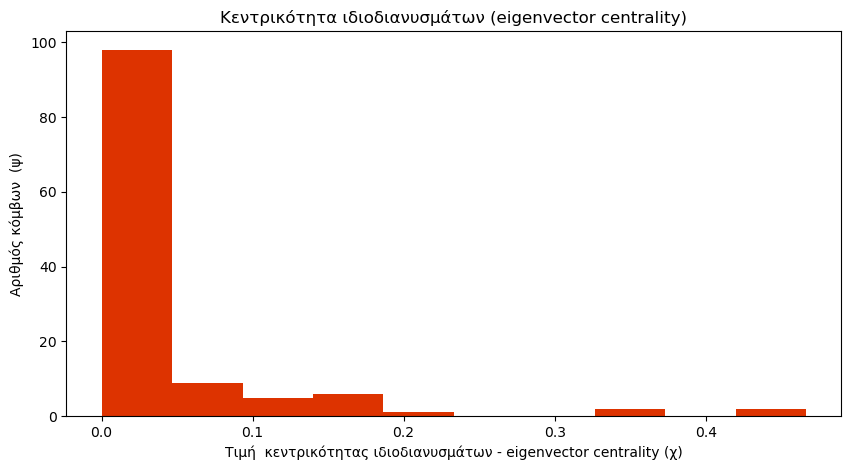

In [24]:
plt.figure(figsize=(10,5))
plt.title('Κεντρικότητα ιδιοδιανυσμάτων (eigenvector centrality)')
plt.xlabel('Τιμή  κεντρικότητας ιδιοδιανυσμάτων - eigenvector centrality (χ)')
plt.ylabel('Αριθμός κόμβων  (ψ)')

#Η συνάρτηση nx.centrality.eigenvector_centrality(graph) υπολογίζει την κεντρικότητα ιδιοδιανυσμάτων
plt.hist(nx.centrality.eigenvector_centrality(graph).values(), color="#dd3300", bins=10)
plt.show()

# Γ' Μέρος Εργασίας

### Εντοπισμός κοινοτήτων με τη μέθοδο Modularity Maximization

In [25]:
#Υπολογισμός χρόνου
start_time = time.time()

# Βρίσκουμε τα communities με με τη μέθοδο Modularity Maximization
c = community.greedy_modularity_communities(graph)
communities = c

# Τυπώνουμε χρόνο που χρειάστηκε για να βρούμε τον αριθμό των communities
print("Time taken: %.2f seconds" % (time.time() - start_time))

# Τυπώνουμε τον αριθμό των communities
print("Number of communities:", len(communities))

# Yπολογισμός modularity
modularity = community.modularity(graph, communities)

# Τυπώνουμε την τιμή modularity
print("Modularity value:", modularity)
print("-------------------------------------------------------------------------------------------")
print("-------------------------------------------------------------------------------------------")

#Τυπώνουμε τα communities
i=1
for x in communities:
    c = list(x)
    c = [int(node) for node in c]
    c.sort()
    print(f"Community {i}:", c)
    i+=1

print("-------------------------------------------------------------------------------------------")
print("-------------------------------------------------------------------------------------------")

Time taken: 0.01 seconds
Number of communities: 11
Modularity value: 0.7594327415765229
-------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------
Community 1: [5, 10, 15, 20, 23, 25, 29, 44, 46, 51, 55, 72, 77, 81, 98, 103, 107, 124]
Community 2: [2, 3, 7, 8, 12, 13, 17, 18, 30, 39, 56, 65, 82, 86, 91, 108, 117]
Community 3: [6, 47, 48, 57, 58, 59, 60, 61, 62, 64, 66, 67, 68]
Community 4: [16, 99, 100, 109, 110, 111, 112, 113, 114, 116, 118, 119, 120]
Community 5: [4, 24, 26, 27, 28, 37, 43, 45, 79, 80, 89, 95]
Community 6: [9, 49, 50, 52, 53, 54, 63, 69, 70, 71]
Community 7: [19, 101, 102, 104, 105, 106, 115, 121, 122, 123]
Community 8: [34, 36, 40, 42, 87, 88, 92, 93, 94]
Community 9: [21, 22, 31, 32, 33, 35, 38, 41]
Community 10: [11, 73, 74, 83, 84, 85, 90]
Community 11: [14, 75, 76, 78, 96, 97]
---------------------------------------------------------------

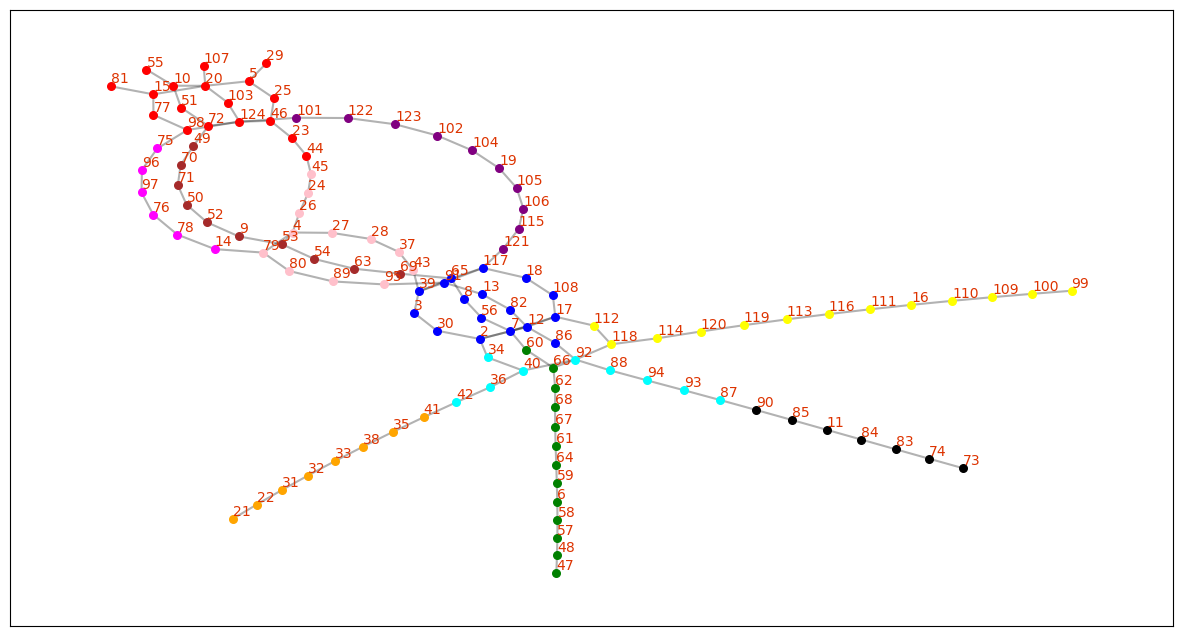

In [26]:
#χρώματα για την κάθε ομάδα κόμβων
colors = ["red", "blue", "green", "yellow", "pink", "brown", "purple", "cyan", "orange", "black", "magenta"]

#Διάγραμμα των κοινωτήτων του Modularity Maximization
plt.figure(figsize=(15,8))
pos = nx.kamada_kawai_layout(graph)
for community_id, c in enumerate(communities):
    nodes = list(c)
    nx.draw_networkx_nodes(graph, pos, nodelist=nodes, node_color=colors[community_id], node_size= 30)
nx.draw_networkx_edges(graph, pos, **edge_options)
nx.draw_networkx_labels(graph, pos, **node_label_options)
plt.show()

### Spectral Clustering

Time taken: 0.08 seconds
Community  1 : [0, 1, 2, 3, 4, 5, 6, 19, 20, 21, 22, 23, 32, 33, 34, 35, 44, 45, 46, 47, 62, 66, 69, 70, 71, 72, 83, 85, 90, 104, 105, 106, 107, 122]
Community  2 : [29, 30, 31, 91, 92, 93, 101, 102, 103]
Community  3 : [12, 13, 14, 15, 26, 27, 28, 38, 39, 40, 51, 52, 56, 57, 58, 73, 79, 96, 112]
Community  4 : [53, 54, 55, 63, 64, 65, 67, 68]
Community  5 : [18, 84, 86, 87, 88, 89]
Community  6 : [41, 42, 108, 109, 110]
Community  7 : [16, 17, 74, 75, 76]
Community  8 : [43, 117, 118, 119, 120, 121]
Community  9 : [48, 49, 50, 111, 113, 114, 115, 116]
Community  10 : [10, 24, 25, 77, 78, 80, 81, 82]
Community  11 : [7, 8, 9, 11, 36, 37, 59, 60, 61, 94, 95, 97, 98, 99, 100]


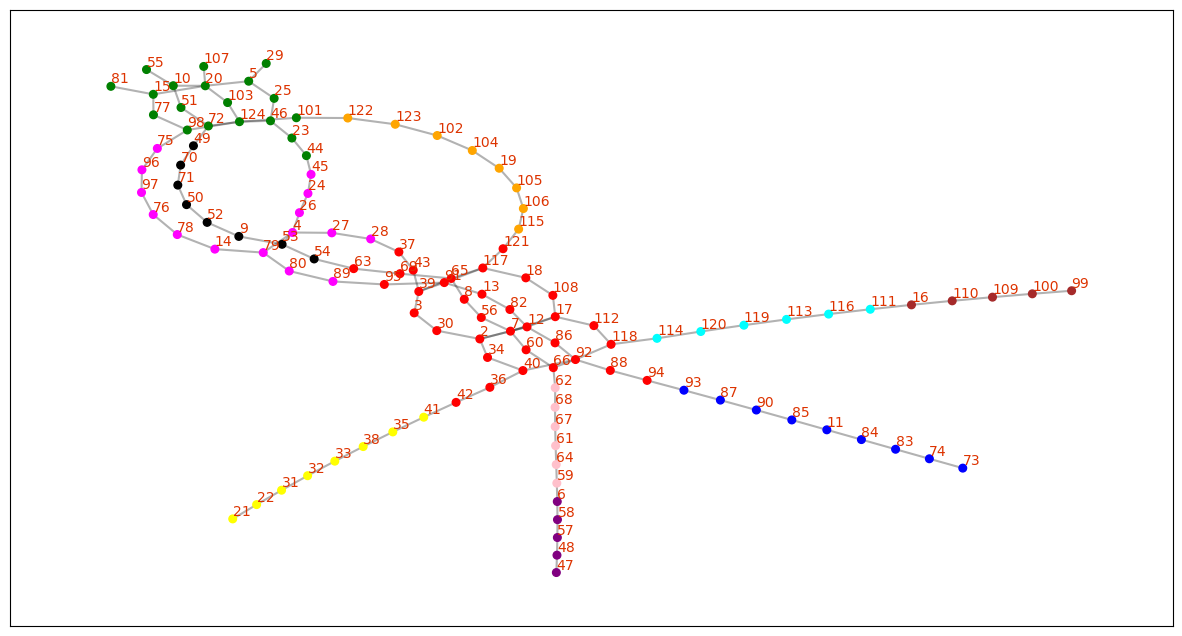

In [27]:
# Προεργασία του γράφου
graph.remove_edges_from(nx.selfloop_edges(graph))
G = graph.to_undirected()

#Υπολογισμός χρόνου
start_time = time.time()

# Υπολογισμός του πίνακα γειτνίασης
A = nx.to_numpy_array(G)

# Υπολογισμός του Spectral Clustering
sc = SpectralClustering(n_clusters=11, affinity="precomputed")
community_assignments = sc.fit_predict(A)

# Τυπώνουμε χρόνο που χρειάστηκε για να βρούμε τον αριθμό των communities
print("Time taken: %.2f seconds" % (time.time() - start_time))

#Tυπώνουμε τα communities
for i in range(11):
        print("Community ", i+1, ":", [j for j, y in enumerate(community_assignments) if y == i])

# Σχεδιάγραμμα του γράφου με βάση τα community assignments του spectral clustering
plt.figure(figsize=(15,8))
pos = nx.kamada_kawai_layout(G)
color_map = [colors[c] for c in community_assignments]
nx.draw_networkx_nodes(G, pos, node_color=color_map, node_size= 30)
nx.draw_networkx_edges(G, pos, **edge_options)
nx.draw_networkx_labels(G, pos, **node_label_options)
plt.show()

In [28]:
#Δεν κατάφερα να τρέξω το modularity στο συγγεκριμένο παράδειγμα, ισως να φταίει το dataset που επέλεξα
#modularity = community.modularity(graph, community_assignments)

### Girvan Newman

Number of communities: 122
Time taken: 0.78 seconds
Modularity:  0.46540034159722576


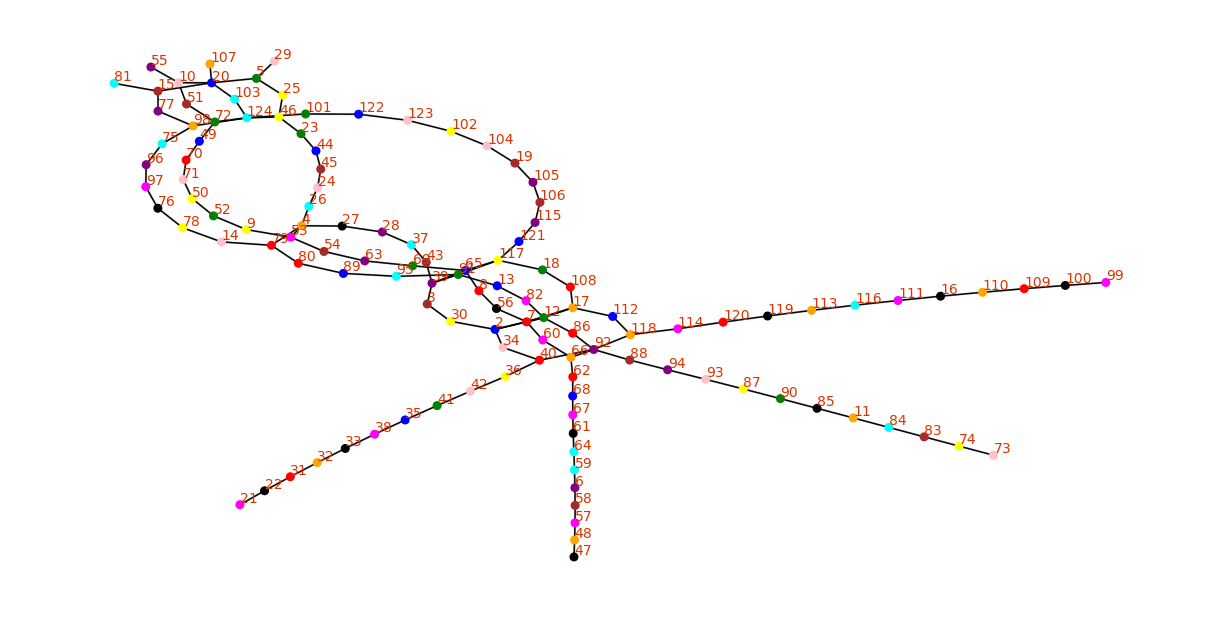

In [36]:
#Υπολογισμός χρόνου
start_time = time.time()

# Βρίσκουμε τις κοινώτητες με τη χρήση του Girvan-Newman
communities_g = list(community.girvan_newman(graph))

# Τυπώνουμε τον αριθμό των communities
print("Number of communities:", len(communities_g))

# Τυπώνουμε χρόνο που χρειάστηκε για να βρούμε τον αριθμό των communities
print("Time taken: %.2f seconds" % (time.time() - start_time))

# Παίρνουμε την πρώτη κοινώτητα
community1 = communities_g[0]

# Αντιστοιχίζουμε τον κάθε κόμβο στην κοινώτητά του
node_to_community = dict(zip(graph.nodes(), [i%11 for i in range(len(graph))]))

# Υπολογίζουμε την τιμή modularity της 1ης κοινώτητας
modularity = nx.algorithms.community.modularity(graph, community1)

# Τυπώνουμε την τιμή modularity
print("Modularity: ", modularity)

# Εμφανίζουμε το σχήμα
plt.figure(figsize=(12,6))
pos = nx.kamada_kawai_layout(graph)
color_map = [colors[node_to_community[node]] for node in graph]
nx.draw(graph, pos, node_color=color_map, node_size= 30)
nx.draw_networkx_edges(G, pos, **edge_options)
nx.draw_networkx_labels(G, pos, **node_label_options)
plt.show()